In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
N = 100

In [68]:
init_random = np.random.random(N) #Gives a random number from 0.0 to 1.0 open
lattice_n = np.zeros(N)
lattice_n[init_random >= 0.50] = 1
lattice_n[init_random < 0.50] = -1

In [69]:
#print(lattice_n)

In [70]:
def Energy_Ising1d(s):
    
    n = np.size(s)
    
    E = 0.0
    
    for j in range(n-1):
        E -= s[j]*s[j+1]
        
    E -= s[0]*s[n-1] # Correction for PBC
    return E 

In [71]:
Energy_Ising1d(lattice_n)

0.0

In [49]:
def metropolis(spin_arr, steps, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(steps-1)
    net_energy = np.zeros(steps-1)
    for t in range(0,steps-1):
        x = np.random.randint(N)
        spin_i = spin_arr[x] #Initial spin
        spin_f = spin_i*(-1) #Proposed spin flip
        
        #h = 1
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        
        E_i += - spin_i*spin_arr[x-1] - spin_i*spin_arr[(x+1)%N] #- h*spin_i
        E_f += - spin_f*spin_arr[x-1] - spin_f*spin_arr[(x+1)%N] #- h*spin_f
        
        
        dE = E_f - E_i
        if (dE>0) and (np.random.random()<np.exp(-BJ*dE)):
            spin_arr[x]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
        
    return net_spins, net_energy

In [14]:
spins, energies = metropolis(lattice_n, 100000000, 0.9, Energy_Ising1d(lattice_n))

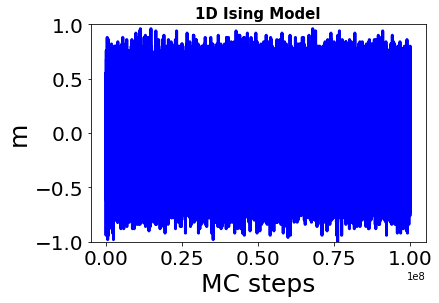

In [15]:
m = spins/N
plt.plot(m, lw=3, color='blue')
#plt.xlim(0,1000)
plt.ylim(-1,1)
plt.xlabel('MC steps', fontsize='25')
plt.ylabel('m', fontsize='25')
plt.tick_params(labelsize=20)
plt.title('1D Ising Model', fontsize= 15, fontweight='bold')
#plt.legend(loc='upper right', prop={'size': 20})
plt.show()

In [16]:
import scipy.integrate as integrate
import scipy
import scipy.special as special 

# Large Deviation Theory Equations
bJ = 0.9
a1 = np.exp(2*bJ)
a2 = np.exp(-2*bJ)
a3 = np.exp(-bJ)

def gamma(x):
    return np.log( (x*np.exp(-2*bJ) + np.sqrt(1 - x*x*(1 - np.exp(-4*bJ))) )/(np.sqrt(1-x*x)))
def lam(x):
    return np.log((np.sqrt(a1*(1-x*x) + a2*x*x) + a3)  /  (2*np.cosh(bJ)*np.sqrt(1-x*x)))
def rate(x):
    return x*gamma(x) - lam(x)
def prob(x):
    return np.exp(-N*rate(x))
a = integrate.quad(lambda x: prob(x), -1, 1, full_output=1)[0]
def normprob(x):
    return (1/a)*prob(x)

# Central Limit Theorem equations

def gamma2(x):
    return a2*x
def lam2(x):
    return (1/2)*a2*x*x
def rate2(x):
    return x*gamma2(x) - lam2(x)
def prob2(x):
    return np.exp(-N*rate2(x))
b = integrate.quad(lambda x: prob2(x), -1, 1, full_output=1)[0]
def normprob2(x):
    return (1/b)*prob2(x)

print(b)

print(a)

0.6165015450971221
0.6023969652618788


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


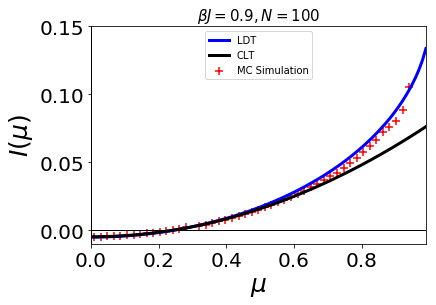

In [43]:
k = 101
meq = m[20000000:]
n, bins, patches = plt.hist(meq, bins=k, align='left', density=True)
plt.clf()
t = np.arange(bins[0], bins[k], (bins[k]-bins[0])/k)
simrate = -(1/N)*np.log(n)

#plt.scatter(t, n, color='red', s=50, marker='+', label='MC Simulation')
plt.scatter(t, simrate, color='red', s=50, marker='+', label='MC Simulation')

mu = np.arange(-1,1.11,0.01)
#plt.plot(mu, normprob(mu), lw=3, color='blue', label='LDT')
#plt.plot(mu, normprob2(mu), lw=3, color='black', label='CLT')

plt.plot(mu, -(1/N)*np.log(normprob(mu)), lw=3, color='blue', label='LDT')
plt.plot(mu, -(1/N)*np.log(normprob2(mu)), lw=3, color='black', label='CLT')

plt.plot(mu, 0*mu, lw=1, color='black')
plt.vlines(0, -0.01, 0.15, color='black', lw=1)

plt.xlim(0, 0.99)
plt.ylim(-0.01,0.15)

plt.xlabel(r'$\mu$', fontsize='25')
plt.ylabel(r'$I(\mu)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$\beta J=0.9, N=100$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper center', prop={'size': 10})
plt.savefig('/Users/κωτς/Desktop/image6.pdf', transparent=True, bbox_inches='tight')